In [47]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
# load the data from a csv file
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [49]:
# Change the column names to all lowercase with no spaces
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [50]:
# verify the datatypes and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
serial_no.           500 non-null int64
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    500 non-null int64
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null int64
chance_of_admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [51]:
# check general stats
df.describe()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


The research column seems to be of categorical type since an applicant has wether done research or not done it.

In [52]:
# further exploring the research column
df.research.unique()

array([1, 0], dtype=int64)

In [53]:
# changing the datatype to categorical
research = pd.api.types.CategoricalDtype(categories=[0,1])
df['research'] = df['research'].astype(research)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
serial_no.           500 non-null int64
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    500 non-null int64
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null category
chance_of_admit      500 non-null float64
dtypes: category(1), float64(4), int64(4)
memory usage: 31.9 KB


In [78]:
df.university_rating.unique()

array([4, 3, 2, 5, 1], dtype=int64)

In [80]:
univ_ratings = pd.api.types.CategoricalDtype(ordered=True, categories=[1,2,3,4])
df['university_rating'] = df['university_rating'].astype(univ_ratings)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
serial_no.           500 non-null int64
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    427 non-null category
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null category
chance_of_admit      500 non-null float64
dtypes: category(2), float64(4), int64(3)
memory usage: 28.7 KB


In [55]:
# check for duplicate records
sum(df.duplicated())

0

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
serial_no.           500 non-null int64
gre_score            500 non-null int64
toefl_score          500 non-null int64
university_rating    427 non-null category
sop                  500 non-null float64
lor                  500 non-null float64
cgpa                 500 non-null float64
research             500 non-null category
chance_of_admit      500 non-null float64
dtypes: category(2), float64(4), int64(3)
memory usage: 28.7 KB


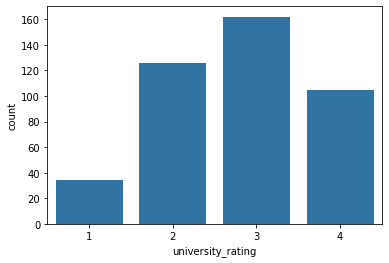

In [102]:
base_color = sns.color_palette()[0]
sns.countplot(data=df, x='university_rating', color=base_color);

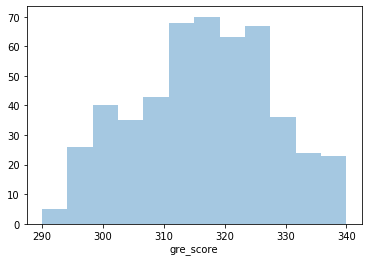

In [116]:
sns.distplot(df['gre_score'], kde=False);

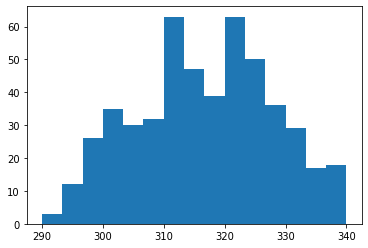

In [107]:
plt.hist(data=df, x='gre_score',bins=15);

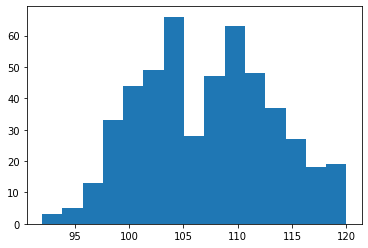

In [110]:
plt.hist(data=df, x='toefl_score',bins=15);

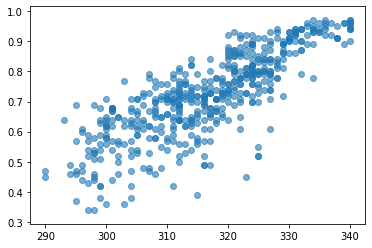

In [67]:
plt.scatter(data=df, x='gre_score', y='chance_of_admit', alpha=0.6);

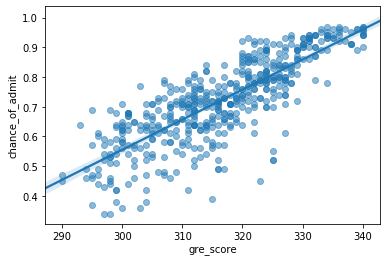

In [70]:
sns.regplot(data=df, x='gre_score', y='chance_of_admit', scatter_kws={'alpha':0.5});

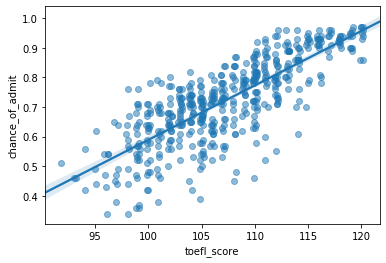

In [114]:
sns.regplot(data=df, x='toefl_score', y='chance_of_admit', scatter_kws={'alpha':0.5}, x_jitter=0.2);

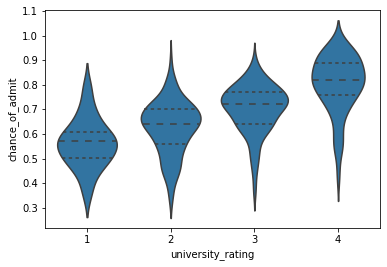

In [86]:
base_color = sns.color_palette()[0]
sns.violinplot(data=df, x='university_rating', y='chance_of_admit', inner='quartile', color=base_color);

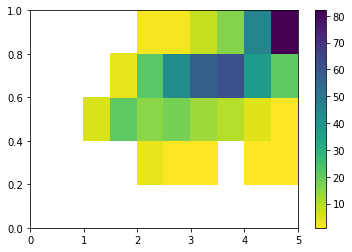

In [99]:
bin_x = np.arange(0, df['sop'].max()+0.5, 0.5)
bin_y = np.arange(0, df['chance_of_admit'].max()+0.2, 0.2)
plt.hist2d(data=df, x='sop', y='chance_of_admit', bins=[bin_x,bin_y], cmap='viridis_r',cmin=0.5);
plt.colorbar();

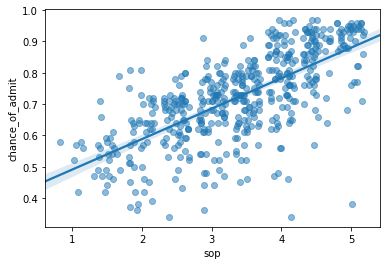

In [98]:
sns.regplot(data=df, x='sop', y='chance_of_admit', scatter_kws={'alpha':0.5}, x_jitter=0.2);

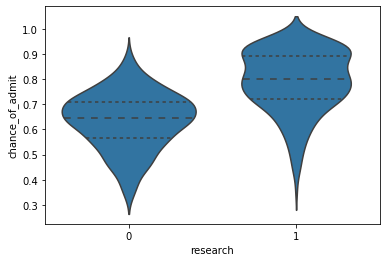

In [62]:
base_color = sns.color_palette()[0]
sns.violinplot(data = df, x='research', y='chance_of_admit', color = base_color, inner='quartile');
# plt.xticks(rotation = 15)

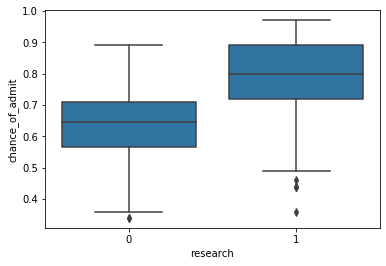

In [63]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x='research', y='chance_of_admit', color = base_color);

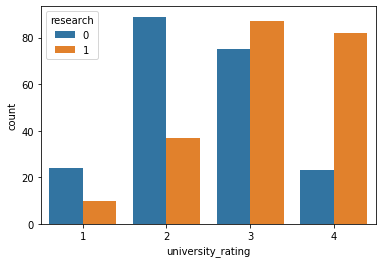

In [115]:
sns.countplot(data=df, x='university_rating', hue='research');